# Airplane Strikes Exploratory Data Analysis

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import pickle
import numpy as np
import seaborn as sns
import missingno as msno
import scipy.stats as st

Load csv file into colab, look at the summary statistics, look at the head and tail of the data.

In [3]:
data_path = 'drive/My Drive/Airplane/'
airplane_data = pd.read_csv(data_path+"Airplane Strikes Dataset.csv")

airplane_data.describe()

<ipython-input-3-e6804f14f338>:2: DtypeWarning: Columns (9,12,15,17) have mixed types. Specify dtype option on import or set low_memory=False.
  airplane_data = pd.read_csv(data_path+"Airplane Strikes Dataset.csv")


,Record ID,Incident Year,Incident Month,Incident Day,Aircraft Mass,Engine Make,Engines,Engine2 Position,Engine4 Position,Height,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
count,174104.000000,174104.000000,174104.000000,174104.000000,127320.000000,123434.000000,127342.000000,118715.000000,3092.000000,103677.000000,...,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000
mean,241204.036915,2006.036392,7.171840,15.712264,3.510611,21.306958,2.057656,2.918570,2.058538,831.032283,...,0.102703,0.004733,0.046242,0.005813,0.011235,0.004176,0.005962,0.004216,0.090727,0.008989
std,94013.682213,6.747708,2.790152,8.799405,0.873783,11.023161,0.469374,2.008204,1.441000,1803.650833,...,0.303571,0.068633,0.210010,0.076019,0.105397,0.064485,0.076983,0.064793,0.287222,0.094383
min,1000.000000,1990.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,205411.750000,2001.000000,5.000000,8.000000,3.000000,10.000000,2.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,249102.500000,2007.000000,8.000000,16.000000,4.000000,22.000000,2.000000,1.000000,1.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,322592.250000,2012.000000,9.000000,23.000000,4.000000,34.000000,2.000000,5.000000,4.000000,800.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,367445.000000,2015.000000,12.000000,31.000000,5.000000,92.000000,4.000000,7.000000,5.000000,31300.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
airplane_data.head()

,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,...,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,...,0,0,0,0,0,0,0,0,1,0
2,129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,NaN,...,0,0,0,0,0,0,0,0,0,0
4,2257,1990,1,3,MIL,MILITARY,F-16,A,561,NaN,...,0,0,0,0,0,0,0,0,0,0


In [5]:
airplane_data.tail()

,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
174099,366091,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42.0,...,0,0,0,0,0,0,0,0,0,0
174100,365902,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42.0,...,0,0,0,0,0,0,0,0,0,0
174101,365903,2015,9,30,BUS,BUSINESS,CITATIONJET,A,226,49.0,...,1,1,0,0,0,0,0,0,0,0
174102,366046,2015,9,30,QXE,HORIZON AIR,DHC8 DASH 8,A,303,10.0,...,1,0,0,0,0,0,0,0,0,0
174103,365823,2015,9,30,AWI,AIR WISCONSIN AIRLINES,CRJ100/200,A,188,10.0,...,0,0,0,0,0,0,0,0,1,0


While the center of data info for Record IDs isn't as useful, the median of the damages for most columns is 0. This could mean that most airplane strikes don't incur any damages or there wasn't any information recorded for each entry.

Determine how many lists/entries are in the dataset:

In [6]:
airplane_data.shape

(174104, 66)

Isolating the numerical features in the data set:

In [7]:
num_features = airplane_data.select_dtypes(include=[np.number])
num_features.columns

Index(['Record ID', 'Incident Year', 'Incident Month', 'Incident Day',
       'Aircraft Mass', 'Engine Make', 'Engines', 'Engine2 Position',
       'Engine4 Position', 'Height', 'Speed', 'Distance', 'Fatalities',
       'Injuries', 'Aircraft Damage', 'Radome Strike', 'Radome Damage',
       'Windshield Strike', 'Windshield Damage', 'Nose Strike', 'Nose Damage',
       'Engine1 Strike', 'Engine1 Damage', 'Engine2 Strike', 'Engine2 Damage',
       'Engine3 Strike', 'Engine3 Damage', 'Engine4 Strike', 'Engine4 Damage',
       'Engine Ingested', 'Propeller Strike', 'Propeller Damage',
       'Wing or Rotor Strike', 'Wing or Rotor Damage', 'Fuselage Strike',
       'Fuselage Damage', 'Landing Gear Strike', 'Landing Gear Damage',
       'Tail Strike', 'Tail Damage', 'Lights Strike', 'Lights Damage',
       'Other Strike', 'Other Damage'],
      dtype='object')

Finding the categorical features of the dataset:

In [8]:
cat_features = airplane_data.select_dtypes(include=object)
cat_features.columns

Index(['Operator ID', 'Operator', 'Aircraft', 'Aircraft Type', 'Aircraft Make',
       'Aircraft Model', 'Engine Model', 'Engine Type', 'Engine1 Position',
       'Engine3 Position', 'Airport ID', 'Airport', 'State', 'FAA Region',
       'Warning Issued', 'Flight Phase', 'Visibility', 'Precipitation',
       'Species ID', 'Species Name', 'Species Quantity', 'Flight Impact'],
      dtype='object')

# Models

Missingno Matrix, to determine where nulls are present in the dataset for each column.

<Axes: >

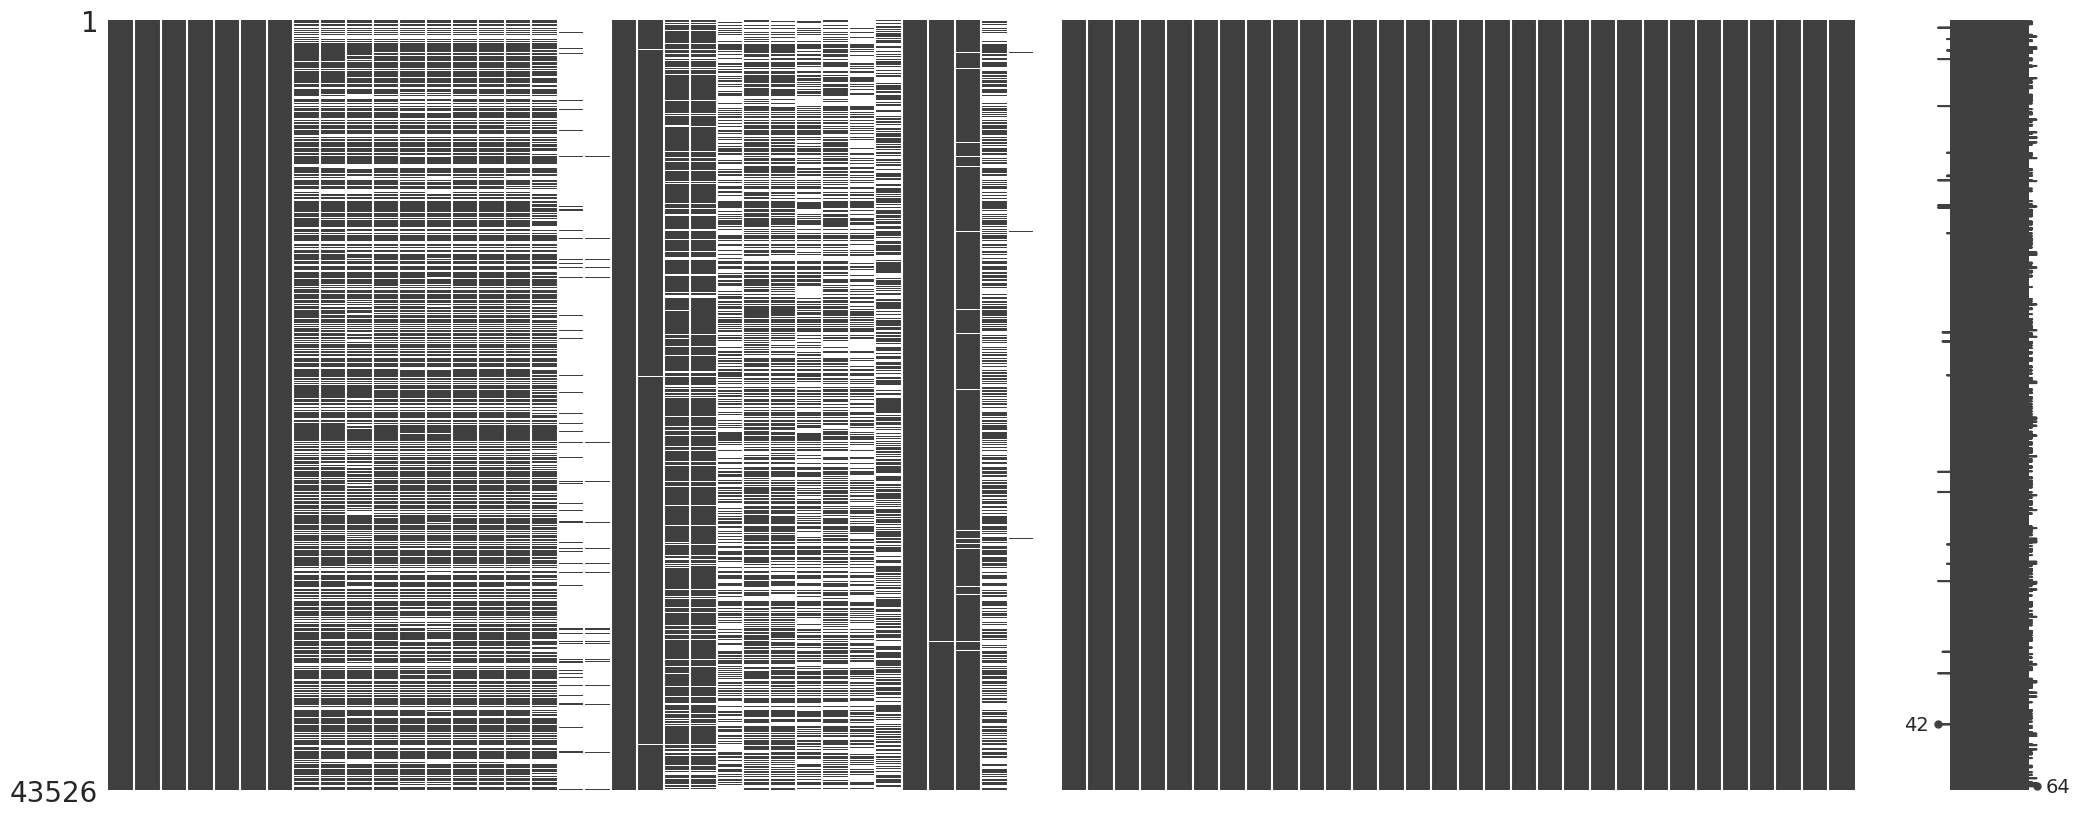

In [24]:
msno.matrix(airplane_data.sample(43526))

From the sample, it seems that while the IDs, basic aircraft info, and dates of occurrance
of the airplane crashes are almost always recorded, there are various null values in columns that ask for something more specific like a certain type of strike or damage.

The Missingno Correlation Heat Map measures how strong the presence of one variable is likely to affect another.

<Axes: >

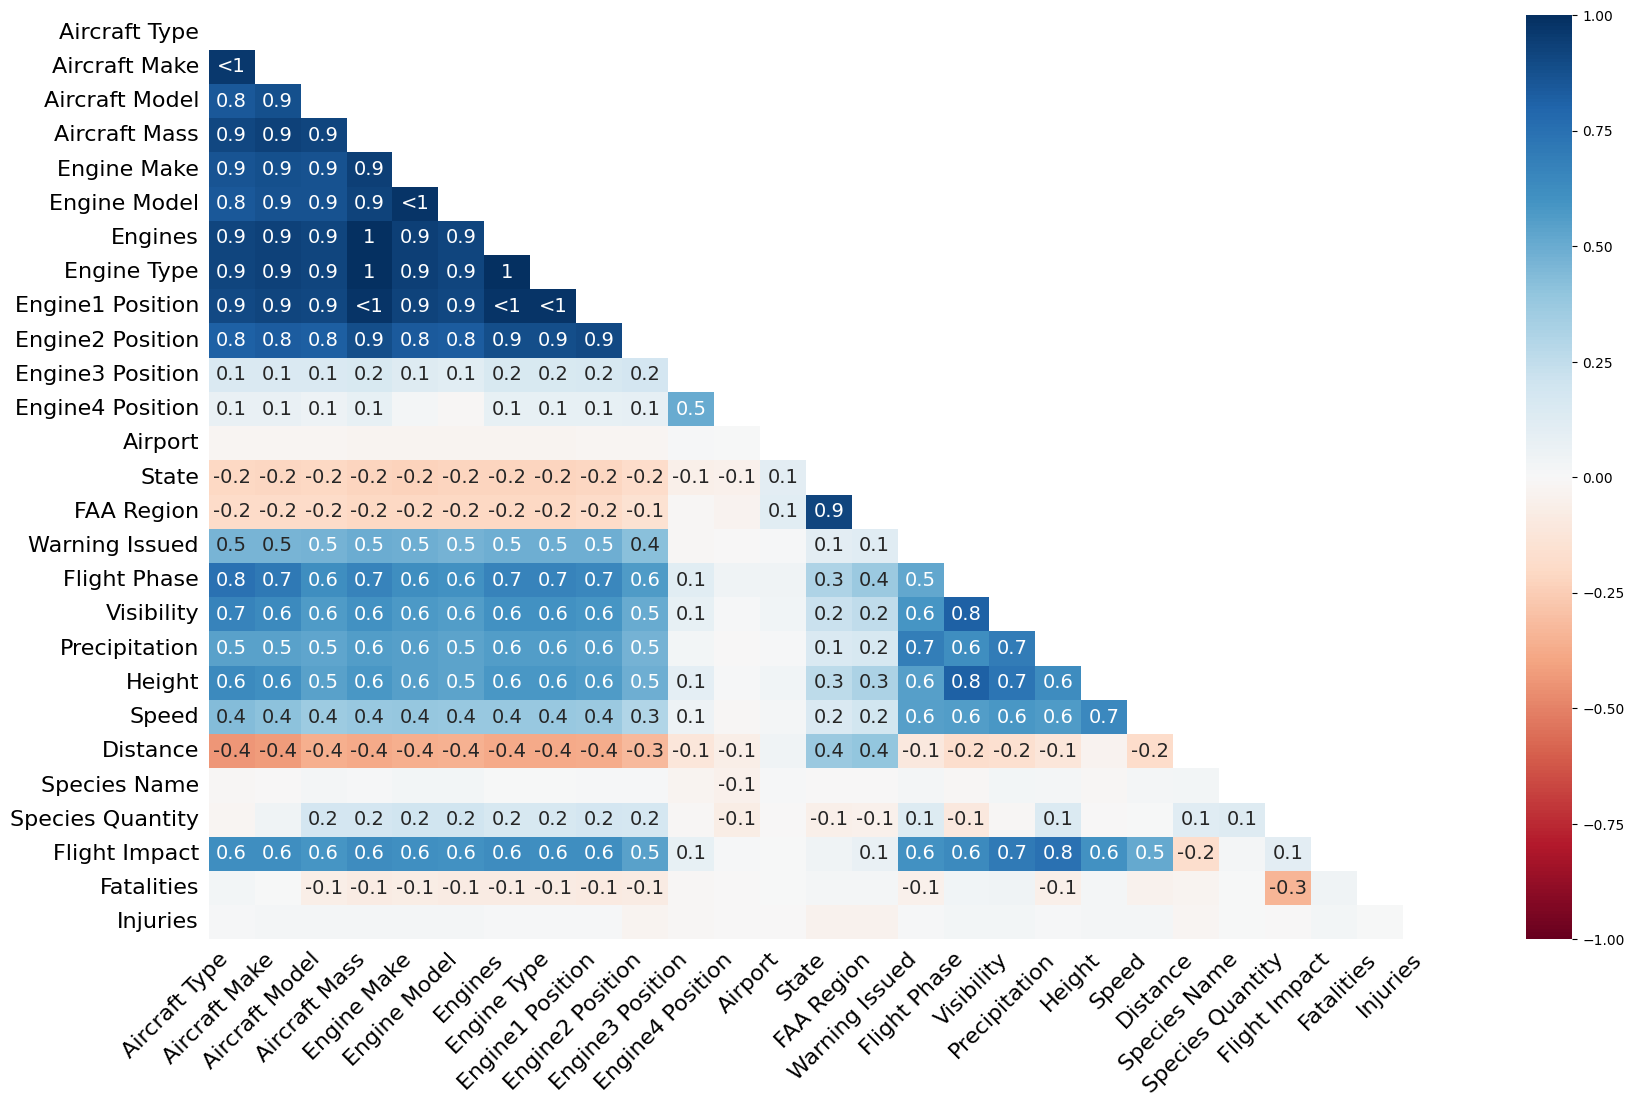

In [10]:
msno.heatmap(airplane_data)

The heatmap also supports my belief in the matrix about the basic aircraft info (most of the time, these values are not null). The heatmap furthers this by showing that they usually either all exist or all don't (high positive values).

It also seems like if information about the crash was recorded, general information about the state of the airplane was also recorded (airplane info vs. visibility, precipitation, flight phase). This is shown by the blue block on the left side of the heatmap.

Finding skew and kurtosis of the dataset:

In [12]:
airplane_data.skew(numeric_only = True), airplane_data.kurt(numeric_only = True)

(Record ID               -0.725974
 Incident Year           -0.578034
 Incident Month          -0.364096
 Incident Day             0.016841
 Aircraft Mass           -1.628933
 Engine Make             -0.104052
 Engines                  1.598358
 Engine2 Position         0.182087
 Engine4 Position         0.634345
 Height                   3.775927
 Speed                    2.386000
 Distance                 8.890145
 Fatalities              14.104171
 Injuries                14.795069
 Aircraft Damage          2.953843
 Radome Strike            2.530017
 Radome Damage           10.310394
 Windshield Strike        2.087841
 Windshield Damage       12.841372
 Nose Strike              2.304669
 Nose Damage             12.209221
 Engine1 Strike           3.878560
 Engine1 Damage           8.138921
 Engine2 Strike           4.380297
 Engine2 Damage           9.114575
 Engine3 Strike          17.643007
 Engine3 Damage          32.050271
 Engine4 Strike          22.765771
 Engine4 Damage     

The skew and kurtosis of columns like IDs aren't as meaningful in this context. However, the kurtosis of the engine damages is extremely high and very skew right. This could mean that when these engine damages are recorded, a bulk majority of them are not large values (or are 0). Categories that have the most normal distribution are engine make, speed, height, incident day, and most of the strike data. Kurtosis was also low in these columns asides from speed and height (could have higher kurtosis due to similar takeoff speeds and state of airplane when hit occurred). Compared to the damage data, the strike data has comparatively lower kurtosis values.

I want to find the correlation between speed and all other variables. My hypothesis is that speed affects how many of these damages and strikes occur (Higher speed = more damages and strikes). First, I determined the correlation coefficient between Speed and all other variables.

In [13]:
correlation = num_features.corr()
print(correlation['Speed'].sort_values(ascending = False),'\n')

Speed                   1.000000
Height                  0.672248
Distance                0.614562
Aircraft Mass           0.431402
Engines                 0.274281
Injuries                0.184517
Radome Strike           0.126920
Radome Damage           0.101157
Engine Make             0.087756
Windshield Strike       0.072678
Fuselage Strike         0.055287
Incident Year           0.053423
Nose Strike             0.037516
Record ID               0.037065
Incident Month          0.027447
Nose Damage             0.021718
Fuselage Damage         0.017825
Tail Damage             0.010199
Engine3 Damage          0.009123
Engine2 Damage          0.001533
Aircraft Damage         0.001303
Engine3 Strike          0.001133
Engine4 Strike         -0.002001
Engine4 Damage         -0.002449
Engine Ingested        -0.003167
Engine1 Damage         -0.003678
Incident Day           -0.004939
Windshield Damage      -0.011136
Lights Damage          -0.012193
Lights Strike          -0.015126
Other Dama

There doesn't seem to be a major correlations between speed and any of these variables. The highest positive correlation values are for height, distance, and aircraft mass. This could be because greater speeds are needed for longer distances, altitudes, and mass.

Using a heatmap to visually see the correlations:

<Axes: title={'center': 'Correlation of Numeric Features with Speed'}>

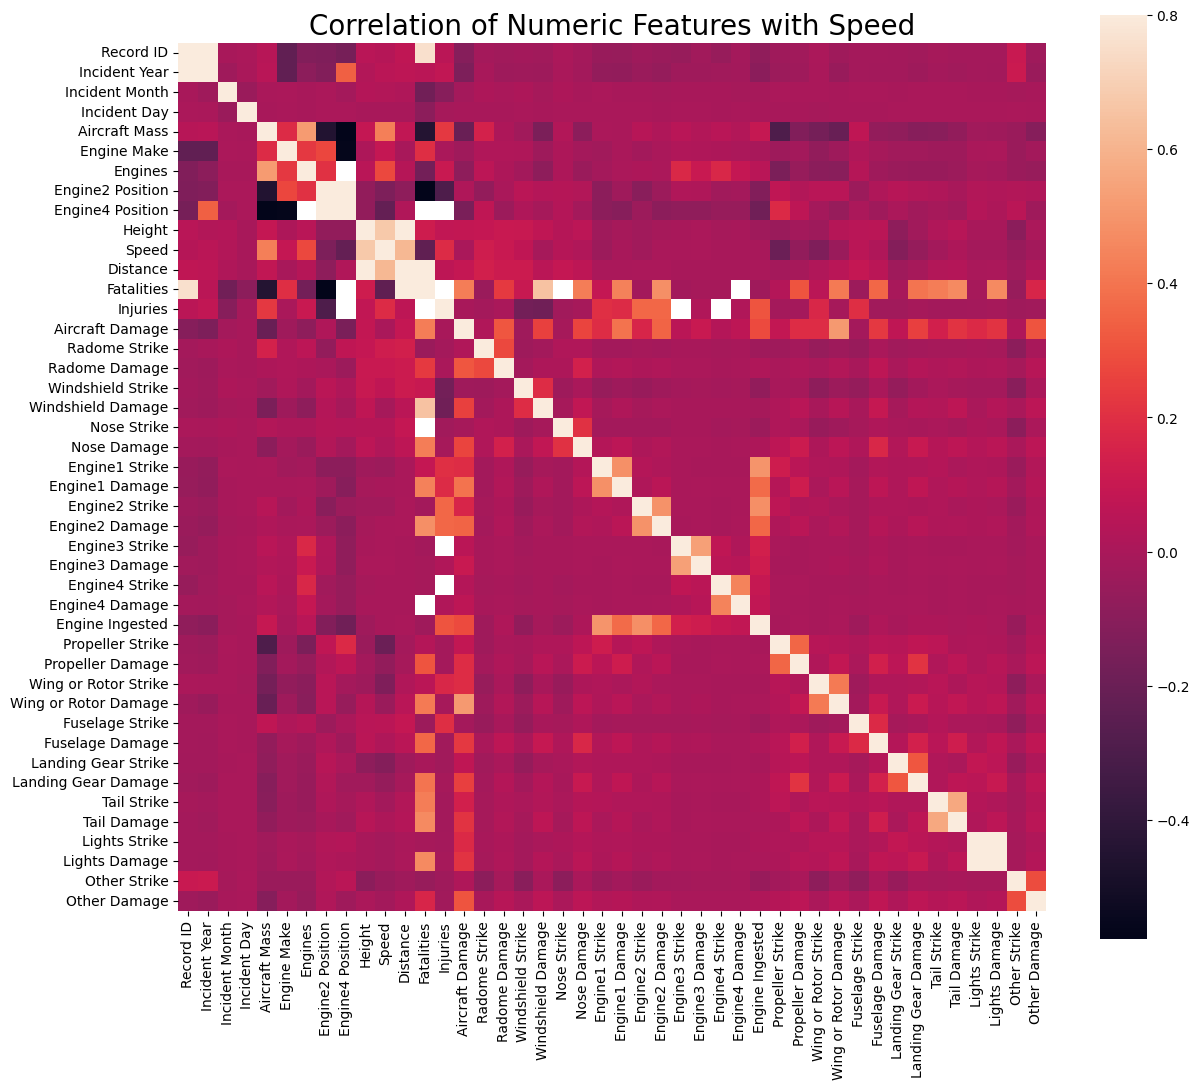

In [14]:
f , ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of Numeric Features with Speed',y=1,size=20)
sns.heatmap(correlation,square = True,  vmax=0.8)

The heatmap displays a more general idea of the correlation of the variables. Visually, there aren't too many correlated values of the columns with speed either. Most of the squares are magenta, which demonstrate very little correlation.

# Categorical Variables

Find categorical variables in dataset, put into new dataframe.

In [15]:
sns.set_style(style = 'whitegrid')
ad_cat = airplane_data.select_dtypes(include = 'object').copy()
ad_cat.head()

,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,Engine Model,Engine Type,Engine1 Position,Engine3 Position,...,State,FAA Region,Warning Issued,Flight Phase,Visibility,Precipitation,Species ID,Species Name,Species Quantity,Flight Impact
0,DAL,DELTA AIR LINES,B-757-200,A,148,26,40,D,1,NaN,...,KY,ASO,NaN,CLIMB,NaN,NaN,NE1,GULL,1,NaN
1,HAL,HAWAIIAN AIR,DC-9,A,583,90,10,D,5,NaN,...,HI,AWP,NaN,TAKEOFF RUN,NaN,NaN,ZZ201,HOUSE SPARROW,1,NaN
2,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,HI,AWP,NaN,NaN,NaN,NaN,R1101,BARN OWL,1,NaN
3,MIL,MILITARY,A-10A,A,345,NaN,NaN,D,NaN,NaN,...,SC,ASO,NaN,APPROACH,DAY,NaN,UNKBM,UNKNOWN MEDIUM BIRD,1,NaN
4,MIL,MILITARY,F-16,A,561,NaN,NaN,NaN,NaN,NaN,...,FL,ASO,NaN,CLIMB,DAY,NaN,ZX,FINCH,1,NaN


My target variable is flight phase—I want to determine if flight phase impacts the damages incurred by the airplane.

In [16]:
fList = ad_cat['Flight Phase'].unique()
print(fList)

['CLIMB' 'TAKEOFF RUN' nan 'APPROACH' 'LANDING ROLL' 'EN ROUTE' 'DESCENT'
 'TAXI' 'PARKED' 'LOCAL' 'ARRIVAL' 'DEPARTURE' 'LANDING']


In [17]:
print(ad_cat['Flight Phase'].nunique())
print(ad_cat['Flight Phase'].isnull().sum())

12
55302


There is a fairly large number of null values—look at percentage to see how many are null.

In [18]:
totRows = len(ad_cat['Flight Phase'])
(ad_cat['Flight Phase'].isnull().sum()/ totRows).round(3)*100

31.8

For nearly a third of the dataset, a flight phase is not given.

<Axes: xlabel='Flight Phase', ylabel='count'>

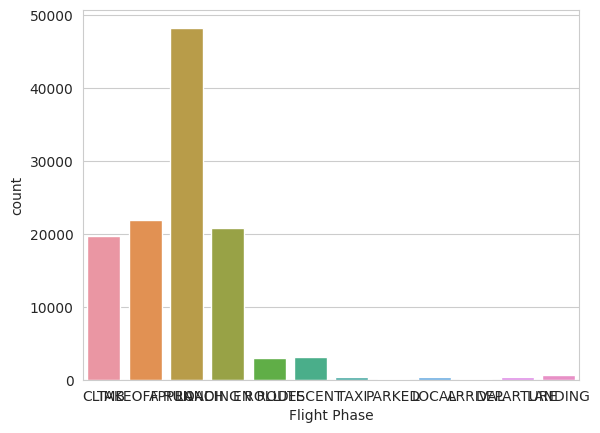

In [19]:
sns.countplot(data = ad_cat, x = 'Flight Phase')

The top three most common flight phases for where these strikes are occurring are during approach, takeoff run, and landing roll, respectively. This could likely be because most wildlife is susceptible to being hit in these phases (typically lower altitudes than en route).

I want to explore the correlation between flight phase and damage taken by the airplane. My hypothesis is that strikes during certain flight phases such as takeoff and landing will cause more damages than others.

Sum all the damage data together to represent total damage incurred by the airplane from strike:

In [20]:
ad_cat['Damage Sum'] = airplane_data['Aircraft Damage'] + airplane_data['Radome Damage'] + airplane_data['Windshield Damage'] + airplane_data['Nose Damage'] + airplane_data['Engine1 Damage'] + airplane_data['Engine2 Damage'] + airplane_data['Engine3 Damage'] + airplane_data['Engine4 Damage'] + airplane_data['Propeller Damage'] + airplane_data['Wing or Rotor Damage'] + airplane_data['Fuselage Damage'] + airplane_data['Landing Gear Damage'] + airplane_data['Tail Damage'] + airplane_data['Lights Damage'] + airplane_data['Other Damage']

In [21]:
ad_cat['Damage Sum'].head()

0    3
1    0
2    0
3    0
4    0
Name: Damage Sum, dtype: int64

<Axes: xlabel='Flight Phase', ylabel='Damage Sum'>

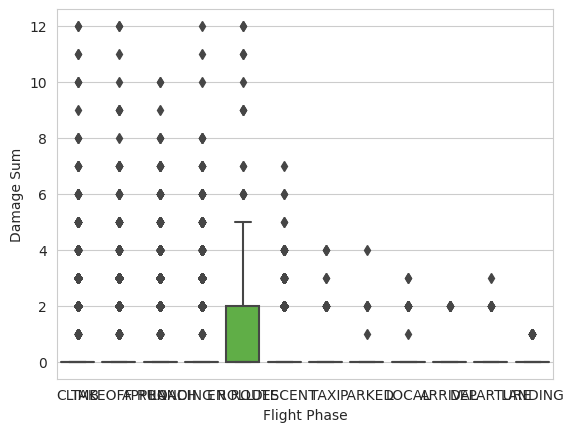

In [22]:
sns.boxplot(data = ad_cat, x='Flight Phase', y='Damage Sum')

However, only the 'en route' category has a box plot drawn. This could be because most of these flight phases didn't have any damages incurred. From the boxplots outliers, the flight phases climb, takeoff run, landing roll, and en route had the maximum amount of damages(when they did happen).

<Axes: xlabel='Flight Phase', ylabel='Damage Sum'>

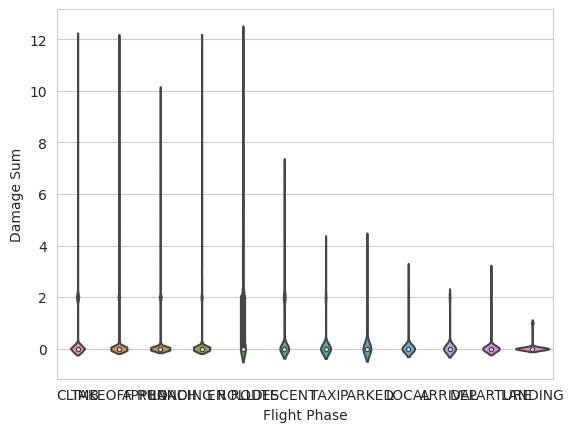

In [23]:
sns.violinplot(data = ad_cat, x='Flight Phase', y='Damage Sum')

Regardless of flight phase, the median is 0. There are the most upper outliers for the climb, takeoff, landing roll, and en route categories. This could mean that when damages do occur, they happen in those flight phases.

## Conclusion

Through this EDA, general features such as the categorical and numerical features of the dataset were identified. The spread of null entries in variables was also addressed—while general information about the airplanes was almost always recorded, information about the strike itself is not as commonly recorded. Although there were no major correlations between speed and other numeric variables, the closest ones were for mass, height, and distance. For categorical variables, the target variable flight phase was explored. The most common entries for strike flight phase were approach, take off run, and landing roll. However, when looking for correlation between damages taken and flight phase, there weren't any types of flight phases that had a significant correlation to damages incurred. This was seen through the models of the boxplot and the violin plot.